# Structures linéaires: Listes chaînées

## Limites des `list` de Python

### Fonctionnement interne

Ce que Python appelle `list` correspond en réalité à ce qu'on appelle ordinairement **tableau** en informatique: 
> les élément d'une `list` sont rangés *consécutivement* en mémoire.

Ainsi, si l'élément d'index 0 a pour adresse $1025_{10}$ en mémoire, l'élément d'index 1 aura pour adresse $1026_{10}$ ($1025+1$) etc.

De façon générale:

$$\text{adresse de l'élément d'index}~i = (\text{adresse de l'élément d'index}~0) + i$$

**Compléments**

En fait, pour une machine dont:
- les **cases mémoires** - unité  possédant une *adresse propre* - font **1 octet** et
- les **mots mémoires**  - unité de *transfert* entre la mémoire et le processeur - font 64 bits (soit **8 octets**), 
l'égalité précédente réelle est plutôt:

$$\text{adresse de l'élément d'index}~i = (\text{adresse de l'élément d'index}~0) + i \times (\overbrace{\text{taille mot en octets}}^{= 8 ~\text{si mot} = 64~ \text{bits}})$$
_____

Plus précisément, ce sont des **tableaux dynamiques**. Lorsqu'on écrit `l = []; a = 2`:
- python réserve en fait un certain nombres de mots mémoire pour la liste - nous prendrons **1024** mots pour l'exemple,
- `2` est alors placé dans le mots mémoire qui suit le dernier mot réservé pour la liste.

Supposons que le premier mot de la liste ait l'adresse $5000_{10}$, alors:
- l'adresse du dernier mot de la liste est ____,
- celle de `2` est ____.

6023 et 6024.

À ce stade, si on fait une boucle comme `for i in range(1025): l.append[i]` il va y avoir un problème...

Au cours de la boucle, Python s'aperçoit que la liste `l` va déborder en mémoire. 

Voilà comment il réagit en interne dans les grandes lignes:

1. Il interrompt la boucle dès que la liste est trop remplie (par exemple plus de 3/4 de la place disponible),


2. il réserve un nouvel emplacement mémoire pour le tableau ...
    - ici à l'adresse $6025_{10}$ (première adresse libre)


3. ... en doublant la taille précédente: il réserve donc 2048 mots mémoire,
    - donc de l'adresse $6025_{10}$ à l'adresse $6025+2048=8073_{10}$,


4. puis il copie les données du vieux tableaux vers le nouveau:
    - ```python
       for i in range(1024):
           if mem[5000+i] is not None:
               mem[6025 + i] = mem[5000 + i]
           else:
               break
      ```


5. il redéfinit `l` de façon qu'il fasse référence à l'adresse 6025,


6. il marque les anciennes adresses (de 5000 à 6023) comme libres,

7. il relance la boucle interrompue.

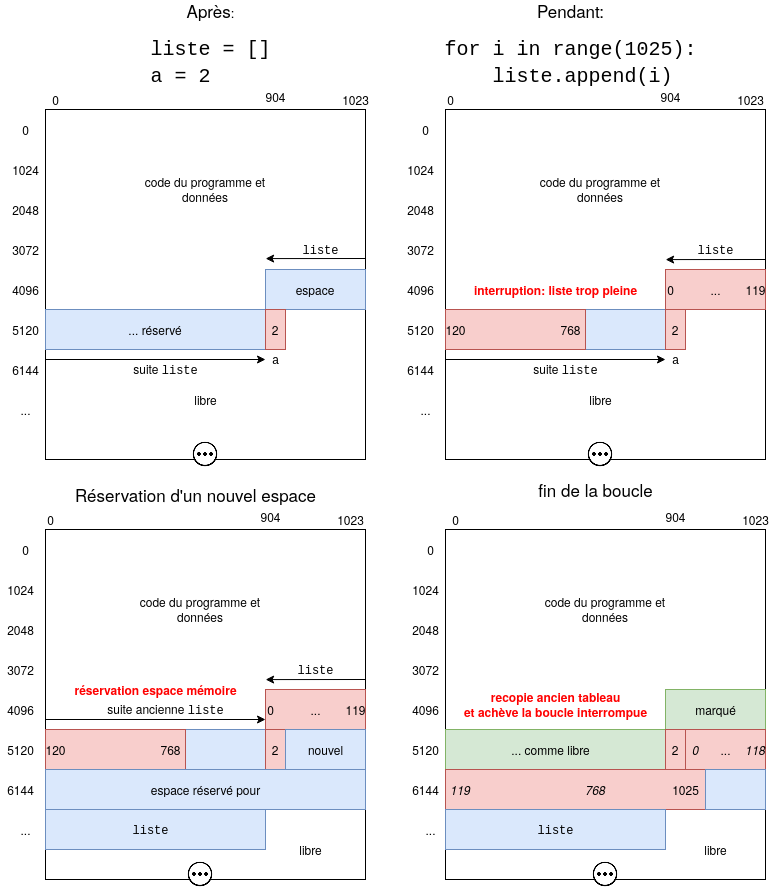

Évidemment, le programmeur ne s'aperçoit de rien même si toutes ces opérations coûtent du temps!

### Point fort des listes

**Ajouter** ou **supprimer** un élément **en fin de liste** est très rapide: temps constant - $O(1)$

Ainsi, `.append`, `.pop`, `.extend`, sont des opérations très efficaces.

De même pour la modification d'un élément `l[i] = valeur`.

### Points faibles

**Insérer** ou **supprimer** un élément à une **position arbitraire** est plus coûteux.

Par exemple, lorsqu'on utilise `.insert(1, elt)`, python doit décaler tous les éléments d'index 2, 3, ... d'une position vers la droite:

In [ ]:
def insert(l, i, x):
    N = len(l)
    # on commence par le dernier
    l.append(l[N-1]) # l[N] = ... produirait une erreur
    
    # puis on poursuit de la droite vers la gauche
    for j in reversed(range(i, N-1)):
        l[j+1] = l[j]
    
    # la place est libre, on place x
    l[i] = x

liste = [1, 2, 3, 4, 5]
insert(liste, 1, "x")
print(liste)

Voir dans [python tutor](http://pythontutor.com/visualize.html#code=def%20insert%28l,%20i,%20x%29%3A%0A%20%20%20%20N%20%3D%20len%28l%29%0A%20%20%20%20l.append%28l%5BN-1%5D%29%0A%20%20%20%20for%20j%20in%20reversed%28range%28i,%20N-1%29%29%3A%0A%20%20%20%20%20%20%20%20l%5Bj%2B1%5D%20%3D%20l%5Bj%5D%0A%20%20%20%20%0A%20%20%20%20l%5Bi%5D%20%3D%20x%0A%0Aliste%20%3D%20%5B1,%202,%203,%204,%205%5D%0Ainsert%28liste,%201,%20%22x%22%29&cumulative=false&curInstr=0&heapPrimitives=false&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

Avec affichage des étapes:

In [ ]:
def insert(l, i, x):
    N = len(l)
    # on commence par le dernier
    l.append(l[N-1]) # l[N] = ... produirait une erreur
    print(f"avant la boucle:\n\t{l}")
    print("dans la boucle:")
    # puis on poursuit de droite à gauche
    for j in reversed(range(i, N-1)):
        l[j+1] = l[j]
        print(f"\t{l}")
    l[i] = x
       
liste = [1, 2, 3, 4, 5]
print(f"Au départ:\n\t{liste}")
insert(liste, 1, "x")
print(f"Finalement:\n\t{liste}")

De même, **supprimer** un élément - `del l[i]` - nécessite de décaler vers la gauche tous les éléments de la liste situés après celui-ci.

In [ ]:
def supprimer(l, i):
    # bon exercice

Le **pire des cas** se produit lorsqu'on on insère un élément à la position 0 ou lorsqu'on supprime cet élément.

La complexité de l'opération est donc ____.

$O(n)$ c'est à dire proportionnelle à la taille $n$ du tableau.

[Référence sur la complexité des opérations sur liste en Python.](https://wiki.python.org/moin/TimeComplexity)

## Liste chaînée «simple» - *Simple Linked List*

### Motivation

Un-e «bon-ne» programmeur-se utilise une structure de données *par rapport* à un **cas d'utilisation** spécifique. 

Si le langage qu'il utilise lui propose des types **adaptés** à son cas d'utilisation, il les réutilise pour ne pas «réinventer la roue»,

Sinon, il forge lui-même ses propres outils/structures pour son cas d'utilisation.

En pratique, il est souvent amené à **adapter des types de données existants**.

La maîtrise des **listes chaînées simples** est la première étape pour parvenir à cette souplesse ou capacité d'adaptation.

### Idée principale

Les listes chaînées sont constitués de **cellules** ou maillons qu'on peut assimiler à un *tableau de taille 2*:
- l'élément d'index 0 pointe vers une **donnée**,
- celui d'index 1 pointe vers ... **la cellule suivante** *s'il y en a une* et, autrement, sur `None` (par exemple).

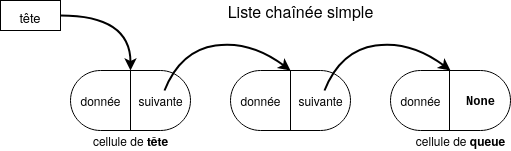

Contrairement aux `list` de Python, les cellules n'ont aucune raison de se trouver à des positions consécutives en mémoire: cela apporte beaucoup de souplesse à la structure comme nous le verrons par la suite.

## Implémentation «basique» avec des tuples

Considérer attentivement cette portion de code:

In [ ]:
cell0 = (1, None) # queue - *tail* - de liste
cell1 = (2, cell0)
cell2 = (3, cell1)
cell3 = (4, cell2) # tête - *head*

liste_chaine = cell3

#liste_chaine -> 4 -> 3 -> 2 -> 1 -> None
liste_chaine

Nous souhaitons afficher «proprement» les valeurs de la liste: «4 -> 3 -> 2 -> 1 -> None». Compléter `___` pour y parvenir.

In [ ]:
# parcourir
courant = liste_chaine
while courant is not None:
    donnee, ___ = courant
    print(donnee, end="->")
print(courant)


In [ ]:
# parcourir
courant = liste_chaine
while courant is not None:
    donnee, courant = courant
    print(donnee, end=" -> ")
print(courant)

Ouvrir et exécuter pour poursuivre:

In [ ]:
# pour nos tests par la suite
def test(l):
    courante = l
    while courante is not None:
        donnee, courante = courante
        print(donnee, end=" -> ")
    print(None)

test(liste_chaine)

### Constructeur - `liste_chaine_simple`

Il n'est pas pratique de construire une liste chaînée à la main comme nous l'avons fait précédemment.

Définissons une fonction - à compléter - pour le faire plus facilement.

In [ ]:
# constructeur
def liste_chaine_simple(*valeurs): # *valeurs: si def f(*vs)... et f(1,2,3,4) alors, **dans f**, vs = [1, 2, 3, 4]
    if len(valeurs) == 0: return None
    
    cellule = (valeurs[-1], None) # queue
    for valeur in reversed(___):
         cellule = (__,__)
    return ___

liste = liste_chaine_simple(3, 7, 10)
test(liste)

In [ ]:
def liste_chaine_simple(*valeurs):
    cell = (valeurs[-1], None)
    for valeur in reversed(valeurs[:-1]):
         cell = (valeur, cell)
    return cell

Une structure de données n'est utile que si l'on dispose d'**opérations** pour la manipuler.

Nous allons en définir cinq: `tete`, `ajouter`, `supprimer`, `longueur`, `nieme`

### `tete(liste)`

renvoie la donnée (non la cellule) en tête de liste

In [ ]:
def tete(liste):
    return ___

assert tete(liste_chaine_simple(3, 4, 5)) == 3

In [ ]:
def tete(liste):
    return liste[0]

### `ajouter(liste, valeur)`

renvoie la liste obtenue en ajoutant `valeur` en tête de `liste`,

In [ ]:
def ajouter(liste, x):
    cell = (x, ___)
    liste = ___
    return liste

liste = ajouter(
    liste_chaine_simple(4, 5, 12),
    "yes"
)
test(liste)

In [ ]:
def ajouter(liste, x):
    cell = (x, liste)
    liste = cell
    return liste

liste = ajouter(
    liste_chaine_simple(4, 5, 12),
    "yes"
)
test(liste)

### `supprimer(liste)`

renvoie la liste obtenue en supprimant la valeur en tête de `liste` ou lève une erreur du type `IndexError` si `liste` est vide,

**Note**: pour générer une erreur utiliser l'instruction `raise <Type d'erreur>(<message erreur>)`.

In [ ]:
def supprimer(liste):
    if ___:
        raise IndexError("Je ne peux pas supprimer la tête de la liste qui est vide")
    _, ___ = liste
    return liste
    
liste_chaine = supprimer(
    liste_chaine_simple(3, 4, 5)
)
test(liste_chaine)

In [ ]:
def supprimer(liste):
    if liste is None:
        raise IndexError("Je ne peux pas supprimer la tête de la liste qui est vide")
    _, liste = liste
    return liste

### `longueur(liste)`

renvoie le nombre d'éléments contenu dans `liste`,

In [ ]:
def longueur(liste):
    # essayer de le faire récursivement
    if liste is ___:
        return ___
    suite = ___
    return ___ + 1

l = liste_chaine_simple(*list("ah! la récursivité!"))
test(l)
assert longueur(l) == 19

In [ ]:
def longueur(liste):
    # version récursive
    if liste is None:
        return 0
    _, suite = liste # ou suite = liste[1]
    return longueur(suite) + 1

longueur(liste_chaine_simple(
    *list("ah! la récursivité!")
    )
)

l = liste_chaine_simple(*list("ah! la récursivité!"))
test(l)
assert longueur(l) == 19

### `nieme(liste, i)`

renvoie la donnée de la cellule n°`i` de `liste` ou lève une erreur du type `IndexError` si la cellule n°`i` n'existe pas.
    
**Note**: pour générer une erreur utiliser l'instruction `raise <Type d'erreur>(<message erreur>)`.

In [ ]:
def nieme(liste, i):
    # avec une boucle
    j = 0
    courante = liste
    while ___:
        if j == i:
            return ___
        else:
            ___
            ___
    ___

def nieme_rec(liste, i):
    # récursivement
    if liste is None: ___
    if i == 0: return ___
    return nieme_rec(liste[1], ___)
    

liste = liste_chaine_simple("ah", "oh", "hein?")
for i in range(longueur(liste)):
    print(nieme_rec(liste, i))

In [ ]:
def nieme(liste, i):
    # avec une boucle
    j = 0
    courante = liste
    while courante is not None:
        if j == i:
            return courante[0]
        else:
            j += 1
            _, courante = courante
    raise IndexError("index trop grand!")

def nieme_rec(liste, i):
    # récursivement
    if liste is None: raise IndexError("index trop grand!")
    if i == 0: return liste[0]
    return nieme_rec(liste[1], i-1)
    

liste = liste_chaine_simple("ah", "oh", "hein?")
for i in range(longueur(liste)):
    print(nieme_rec(liste, i))

### Inconvénients de cette implémentation

Ils sont nombreux:
1. En s'appuyant sur des *tuples*, nos **cellules sont immuables**. 

   Par exemple, il est impossible d'ajouter quoi que ce soit **en queue** de liste... car il faudrait pouvoir changer le `None` de la dernière cellule,
    - se règle facilement en utilisant des listes python mais n'est pas du tout efficace! **Pourquoi?**


2. Toutes nos **opérations** (sauf le constructeur) mentionnent systématiquement la liste sur laquelle elles opèrent, on préfererait écrire:
    - `liste.ajouter(valeur)`, `liste.supprimer()` etc.


3. `type(liste)` renvoie `tuple` alors que nous avons définie une structure qui s'**appuie sur** des tuples mais qui n'**est pas** un tuple,


4. La **structure et ses opérations sont détachées**. Une fonction de nom `ajouter` n'est pas réutilisable car son sens est trop large. 

   On voudrait que la structure et ses opérations forment une **entité unique** et exprimer les opérations plus simplement:
    - `liste = ListeSimple(...)` pour **construire**,
    - `len(liste)` pour connaître sa **longueur**,
    - `liste[i]` pour **lire** la donnée de la cellule n°`i` (plutôt que `nieme(liste, i)`),
    - `for valeur in liste` serait pratique,
    - `print(liste)` devrait afficher v1 -> v2 -> ...,
    - ...


